# PYTHON STOCK MARKET ANALYSIS


This data set consists of a number of companies’ stock data from 2000-2021 including Adani Ports, Bajaj Finance, Wipro, Infosys, and many more. But for this project, we will be analyzing three Tata stocks – Tata Motors, Tata Steel, and Tata Consultancy Services (TCS).

The data in the data set consists of Date, Symbol, Prev Close, Open, High, Low, Last, Close, VWAP, Turnover, Trades, Deliverable Volume, and % Deliverable.

## Data analyzing and Exploring


In [1]:
# Importing Packages

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
tata_motors = pd.read_csv('TATAMOTORS.csv')
tata_steel = pd.read_csv('TATASTEEL.csv')
tcs = pd.read_csv('TCS.csv')

In [3]:
#Viewing Data
print(tata_motors.head())

         Date Symbol Series  Prev Close   Open    High    Low   Last   Close  \
0  2000-01-03  TELCO     EQ      201.60  207.4  217.25  207.4  217.0  216.75   
1  2000-01-04  TELCO     EQ      216.75  217.0  219.00  206.0  211.9  208.20   
2  2000-01-05  TELCO     EQ      208.20  194.0  217.80  194.0  213.1  213.25   
3  2000-01-06  TELCO     EQ      213.25  215.0  229.90  215.0  222.0  222.10   
4  2000-01-07  TELCO     EQ      222.10  224.0  239.90  223.1  239.9  239.90   

     VWAP   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  214.28   676126  1.448775e+13     NaN                 NaN          NaN  
1  209.50   679215  1.422962e+13     NaN                 NaN          NaN  
2  210.33  1120951  2.357684e+13     NaN                 NaN          NaN  
3  225.29  1968998  4.435932e+13     NaN                 NaN          NaN  
4  236.32  2199431  5.197636e+13     NaN                 NaN          NaN  


From the above table, we can view the first 5 rows of the Tata Motors dataset and get a brief overview of the data present.

In [4]:
#checking size of data
tata_motors.shape

(5306, 15)

In [5]:
#Viewing datatypes of all columns
tata_motors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [6]:
#Checking Null Values
tata_motors.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

The columns Trades, “Deliverable”, “Volume” and “%Deliverable” have some NULL values present. We will drop these columns in the “Working on Data” section. These columns will not be used in our analysis.

In [7]:
#checking duplicate values
tata_motors.duplicated().sum()
tata_steel.duplicated().sum()
tcs.duplicated().sum()

0

#### Description of Data in the Dataframe and rounding its values up to two decimal places

In [8]:
tata_motors.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03,2456.00,4792.00,4792.00
mean,409.43,410.15,417.12,402.18,409.45,409.45,409.76,1.046560e+07,2.790772e+14,128439.98,2805962.22,0.36
std,272.48,272.97,277.02,268.03,272.52,272.47,272.49,2.185034e+07,4.674351e+14,104954.58,3579713.03,0.16
min,58.80,58.00,60.70,57.55,58.75,58.80,59.24,1.235100e+04,1.069384e+11,3434.00,12351.00,0.04
25%,174.60,174.76,178.82,171.01,174.72,174.60,175.18,1.668994e+06,7.049025e+13,75478.25,646920.00,0.23
50%,377.25,378.90,384.75,372.60,377.52,377.25,378.46,4.141648e+06,1.967418e+14,100034.00,1636751.50,0.36
75%,523.15,523.48,530.80,515.91,523.49,523.15,523.72,8.706037e+06,3.175959e+14,142064.75,3761212.25,0.48
max,1365.15,1361.00,1382.00,1347.00,1362.00,1365.15,1362.15,3.905778e+08,9.365671e+15,1318669.00,73338482.00,1.00


In [9]:
tata_steel.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,2456.00,4792.00,4792.00
mean,403.39,404.25,411.21,396.51,403.47,403.55,404.06,6165253.31,2.664876e+14,93969.27,1550749.81,0.26
std,187.15,187.56,190.79,183.86,187.27,187.31,187.44,5329084.46,3.012861e+14,58218.86,1215813.11,0.11
min,67.25,66.00,69.70,66.00,67.30,67.25,67.97,23291.00,2.159165e+11,2796.00,24158.00,0.05
25%,275.77,275.60,284.41,270.00,275.81,275.94,276.94,2801379.50,1.118719e+14,57557.25,769850.00,0.18
50%,402.85,403.00,409.38,396.65,402.70,402.90,403.43,4800300.50,1.949303e+14,79400.00,1250946.50,0.25
75%,523.99,525.00,534.72,516.49,523.95,524.08,525.23,7833888.00,3.379640e+14,110710.25,2018065.50,0.33
max,1031.35,1024.00,1052.60,1011.10,1035.00,1034.00,1031.95,64284599.00,4.881124e+15,626502.00,26434718.00,0.97


In [10]:
tcs.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4139.00,4.139000e+03,2456.00,4139.00,4139.00
mean,1693.84,1695.59,1715.88,1673.59,1694.31,1694.37,1694.62,1676761.95,2.952102e+14,85502.71,895220.63,0.55
std,722.88,722.98,728.45,717.78,723.18,723.06,723.14,1607879.26,3.849370e+14,56031.49,863790.82,0.13
min,366.65,360.00,377.75,358.00,365.70,366.65,368.40,18345.00,1.370237e+12,1219.00,7765.00,0.12
25%,1106.25,1105.53,1120.28,1088.58,1107.00,1106.50,1105.75,788477.50,1.050834e+14,46749.50,433474.00,0.46
50%,1633.50,1625.00,1655.00,1610.00,1630.05,1636.35,1629.42,1227748.00,1.824973e+14,68901.00,705264.00,0.55
75%,2326.12,2321.80,2345.00,2301.30,2325.00,2326.85,2319.90,2081119.50,3.455393e+14,110630.25,1136131.50,0.65
max,3603.70,3625.00,3674.80,3572.55,3610.75,3603.70,3633.11,44033577.00,1.268362e+16,542541.00,31556256.00,0.96


## Working on DATA

##### Converting the “Date” column dtype from object to date

In [11]:
tata_motors["Date"] = pd.to_datetime(tata_motors["Date"])
tata_steel["Date"] = pd.to_datetime(tata_steel["Date"])
tcs["Date"] = pd.to_datetime(tcs["Date"])



In [14]:
tata_motors.info


<bound method DataFrame.info of            Date      Symbol Series  Prev Close   Open    High     Low    Last  \
0    2000-01-03       TELCO     EQ      201.60  207.4  217.25  207.40  217.00   
1    2000-01-04       TELCO     EQ      216.75  217.0  219.00  206.00  211.90   
2    2000-01-05       TELCO     EQ      208.20  194.0  217.80  194.00  213.10   
3    2000-01-06       TELCO     EQ      213.25  215.0  229.90  215.00  222.00   
4    2000-01-07       TELCO     EQ      222.10  224.0  239.90  223.10  239.90   
...         ...         ...    ...         ...    ...     ...     ...     ...   
5301 2021-04-26  TATAMOTORS     EQ      294.00  297.0  299.00  294.60  295.85   
5302 2021-04-27  TATAMOTORS     EQ      295.40  295.7  302.50  295.10  302.10   
5303 2021-04-28  TATAMOTORS     EQ      301.50  303.5  309.50  303.00  305.15   
5304 2021-04-29  TATAMOTORS     EQ      305.90  308.9  310.00  301.25  302.20   
5305 2021-04-30  TATAMOTORS     EQ      301.90  298.2  301.30  292.55  293.10

In [15]:
tata_steel.info

<bound method DataFrame.info of            Date     Symbol Series  Prev Close     Open     High      Low  \
0    2000-01-03      TISCO     EQ      142.35   148.00   153.20   146.10   
1    2000-01-04      TISCO     EQ      152.45   150.10   153.00   143.05   
2    2000-01-05      TISCO     EQ      150.80   144.60   162.90   144.60   
3    2000-01-06      TISCO     EQ      156.55   158.95   169.10   158.95   
4    2000-01-07      TISCO     EQ      168.25   173.40   179.00   166.30   
...         ...        ...    ...         ...      ...      ...      ...   
5301 2021-04-26  TATASTEEL     EQ      925.60   935.00   956.00   930.05   
5302 2021-04-27  TATASTEEL     EQ      940.75   948.30   983.00   944.30   
5303 2021-04-28  TATASTEEL     EQ      977.75   985.00   986.00   962.00   
5304 2021-04-29  TATASTEEL     EQ      971.40   983.00  1036.95   983.00   
5305 2021-04-30  TATASTEEL     EQ     1031.35  1024.00  1052.60  1011.10   

         Last    Close     VWAP    Volume      Turnover

In [16]:
tcs.info

<bound method DataFrame.info of            Date Symbol Series  Prev Close     Open     High      Low     Last  \
0    2004-08-25    TCS     EQ      850.00  1198.70  1198.70   979.00   985.00   
1    2004-08-26    TCS     EQ      987.95   992.00   997.00   975.30   976.85   
2    2004-08-27    TCS     EQ      979.00   982.40   982.40   958.55   961.20   
3    2004-08-30    TCS     EQ      962.65   969.90   990.00   965.00   986.40   
4    2004-08-31    TCS     EQ      986.75   986.50   990.00   976.00   987.80   
...         ...    ...    ...         ...      ...      ...      ...      ...   
4134 2021-04-26    TCS     EQ     3109.50  3102.05  3153.00  3088.05  3100.05   
4135 2021-04-27    TCS     EQ     3100.80  3106.00  3136.10  3103.00  3132.75   
4136 2021-04-28    TCS     EQ     3132.00  3149.95  3151.00  3112.00  3123.00   
4137 2021-04-29    TCS     EQ     3124.10  3145.60  3157.35  3105.50  3114.45   
4138 2021-04-30    TCS     EQ     3115.25  3099.00  3132.05  3020.00  3040.00

In [19]:
tata_motors=tata_motors.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tata_steel=tata_steel.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
tcs=tcs.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)

In [20]:
tata_motors.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13


In [21]:
tata_steel.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,TISCO,EQ,142.35,148.00,153.2,146.10,152.50,152.45,150.92,2003185,3.023164e+13
1,2000-01-04,TISCO,EQ,152.45,150.10,153.0,143.05,151.95,150.80,151.03,1555136,2.348785e+13
2,2000-01-05,TISCO,EQ,150.80,144.60,162.9,144.60,158.00,156.55,156.85,3840284,6.023364e+13
3,2000-01-06,TISCO,EQ,156.55,158.95,169.1,158.95,169.00,168.25,167.61,2560449,4.291530e+13
4,2000-01-07,TISCO,EQ,168.25,173.40,179.0,166.30,170.55,171.95,173.89,3641691,6.332459e+13


In [22]:
tcs.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14


In [23]:
tata_motors['Month'] = tata_motors["Date"].dt.month
tata_motors['Year'] = tata_motors["Date"].dt.year
tata_motors['Day'] = tata_motors["Date"].dt.day

In [24]:
tata_steel['Month'] = tata_steel["Date"].dt.month
tata_steel['Year'] = tata_steel["Date"].dt.year
tata_steel['Day'] = tata_steel["Date"].dt.day

In [27]:
tcs['Day']=tcs['Date'].dt.day

tcs['Year']=tcs['Date'].dt.year

tcs['Month']=tcs['Date'].dt.month

## Comparing the DATA

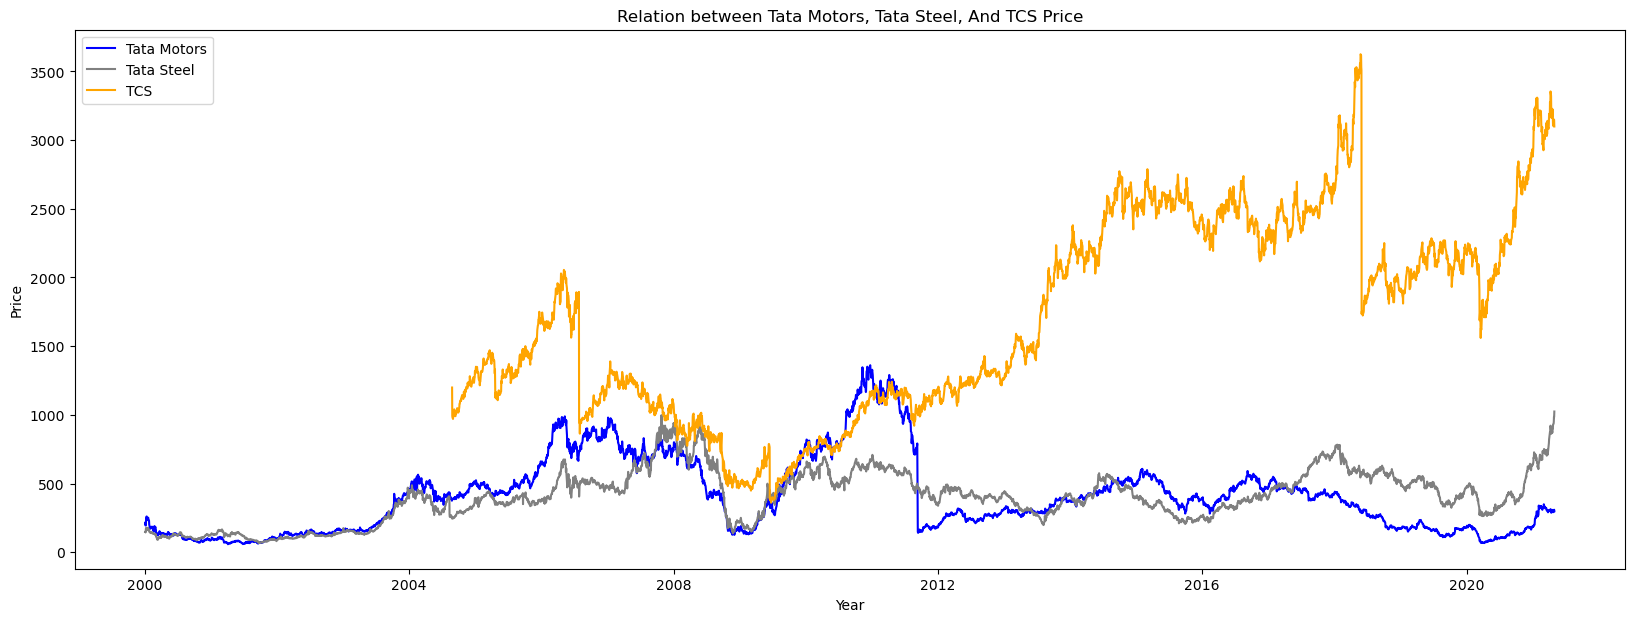

In [28]:
#Price Comparision
plt.figure(figsize=(20,7))
plt.plot(tata_motors['Date'],tata_motors['Open'],color='blue', label='Tata Motors')
plt.plot(tata_steel['Date'],tata_steel['Open'],color='grey', label='Tata Steel')
plt.plot(tcs['Date'],tcs['Open'],color='orange',label='TCS')

plt.title("Relation between Tata Motors, Tata Steel, And TCS Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="")

plt.show()

According to the graph above, the price of TCS has skyrocketed significantly higher than that of Tata Steel and Tata Motors. TCS’s pricing trajectory has been generally upward from its beginning, whereas Tata Steel and Tata Motors have been more on a consolidation trend.

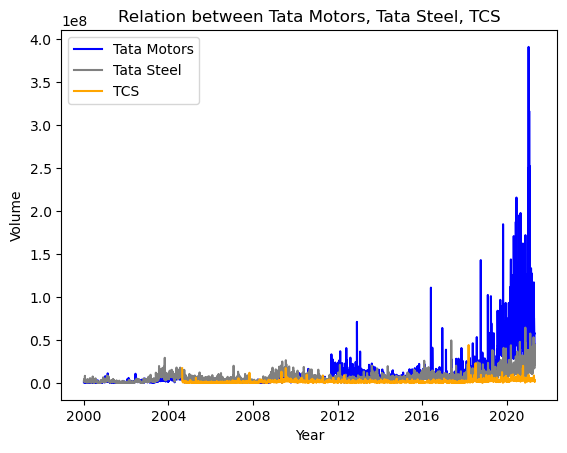

In [29]:
# Volume Comparision
plt.plot(tata_motors['Date'],tata_motors['Volume'],color='blue', label='Tata Motors')
plt.plot(tata_steel['Date'],tata_steel['Volume'],color='grey', label='Tata Steel')
plt.plot(tcs['Date'],tcs['Volume'],color='orange',label='TCS')

plt.title("Relation between Tata Motors, Tata Steel, TCS" )
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend(title="")

plt.show()

Though the price of TCS has risen more significantly as compared to Tata Steel and Tata Motors, we can notice from the above graph that TCS has the least volume signifying that the python stock analysis has been traded comparatively less as compared to Tata Steel and Tata Motors and is lesser liquid.

Tata Motors on the other hand has been traded the most signifying higher liquidity, and better order execution.

### ROI Return on Investment

In [30]:
# TATA MOTORS ROI

sumTM = 0  #total amount invested in tata motors
s1 = 0   #number of shares owned by tata motors

#calculating total amount invested and number of shares owned in Tata Motors
for i in range(len(tata_motors)):
    if tata_motors.loc[i, 'Day']==30:
        sumTM+=tata_motors.loc[i, 'Open']
        s1+=1

#displaying basic results
print("Total Invested in Tata Motors = Rs", round(sumTM, 2))
print("Shares owned of Tata Motors = ", s1)
print("Average Investment of 1 Share = Rs.", round(sumTM/s1,2))

tm_end = 298.2           ## Last open price of tata motors on 2021-04-30

#calculating investment result

result1 = round((tm_end*s1) - sumTM,2)
roiTM = round((result1/sumTM)*100,2)


#Display investment result
print("nInvestment Result: ")

if result1<0:
    print("Net Unrealised LOSS = Rs.",result1)

else:
    print("Net unrealised PROFIT = Rs.", result1)


print("Tata motors ROI from 2000-1-3 to 2021-04-30 : =", roiTM, "%")

Total Invested in Tata Motors = Rs 65977.3
Shares owned of Tata Motors =  162
Average Investment of 1 Share = Rs. 407.27
nInvestment Result: 
Net Unrealised LOSS = Rs. -17668.9
Tata motors ROI from 2000-1-3 to 2021-04-30 : = -26.78 %


In [31]:
## Tata Steel ROI

sumTS=0 #total amount invested in Tata Steel

s2=0 #number of shares owned by Tata Steel

#calcuating total amount invested and number of shares owned in Tata Steel

for i in range(len(tata_steel)):

    if tata_steel.loc[i,'Day']==30:

        sumTS+=tata_steel.loc[i,'Open']

        s2+=1


#displaying basic results

print("Total Invested in Tata Steel = Rs",round(sumTS,2))

print("Shares Own of Tata Steel =",s2)

print("Average Investmentment of 1 share = Rs",round((sumTS/s2),2))



ts_end=1024 #last open price of Tata Steel on 2021-04-30

#obtained by looking at the data or can be seen after executed tata_steel.tail()


#calculating investment results

result2=round((ts_end*s2)-sumTS,2)

roiTS=round((result2/sumTS)*100,2)



#displaying investment results

print("nInvestment Result:")



if result2<0:

    print("Net Unrealised Loss = Rs",result2)

else:

    print("Net Unrealised Profit = Rs",result2)

print("Tata Steel ROI from 2000-1-3 to 2021-04-30 =",roiTS,"%")

Total Invested in Tata Steel = Rs 65825.9
Shares Own of Tata Steel = 162
Average Investmentment of 1 share = Rs 406.33
nInvestment Result:
Net Unrealised Profit = Rs 100062.1
Tata Steel ROI from 2000-1-3 to 2021-04-30 = 152.01 %


In [32]:
#TCS ROI
sumTCS=0 #total amount invested in TCS

s3=0 #number shares owned of TCS




#calcuating total amount invested and number of shares owned in TCS

for i in range(len(tcs)):

    if tcs.loc[i,'Day']==30:

        sumTCS+=tcs.loc[i,'Open']

        s3+=1




#displaying basic results

print("Total Invested in TCS = Rs",round(sumTCS,2))

print("Shares Owned of TCS =",s3)

print("Average Investmentment of 1 share = Rs",round((sumTCS/s3),2))




tcs_end=3099 #last open price of TCS on 2021-04-30

#obtained by looking at the data or can be seen after executed tcs.tail()




#calculating investment results

result3=round((tcs_end*s3)-sumTCS,2)

roiTCS=round((result3/sumTCS)*100,2)




#displaying investment results

print("nInvestment Result:")




if result3<0:

    print("Net Unrealised Loss = Rs",result3)

else:

    print("Net Unrealised Proift = Rs",result3)




print("Tata Steel ROI from 2004-08-25 to 2021-04-30 =",roiTCS,"%")

Total Invested in TCS = Rs 220762.0
Shares Owned of TCS = 128
Average Investmentment of 1 share = Rs 1724.7
nInvestment Result:
Net Unrealised Proift = Rs 175910.0
Tata Steel ROI from 2004-08-25 to 2021-04-30 = 79.68 %


## Investment Results ( Graphically)
#### Plotting ROI on Bar Graph


Text(0, 0.5, 'Percentage')

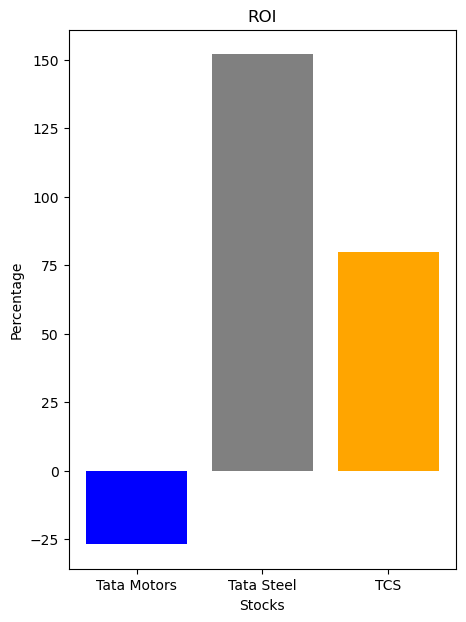

In [34]:
plt.figure(figsize=(5,7))
stock = ['Tata Motors', 'Tata Steel', 'TCS']
ROI = [roiTM, roiTS, roiTCS]
col = ['Blue', 'Grey', 'Orange']

plt.bar(stock,ROI,color=col)

plt.title("ROI")
plt.xlabel("Stocks")
plt.ylabel("Percentage")


#### Plotting Profit/Loss Amount on Bar Graph

Text(0, 0.5, 'Amount')

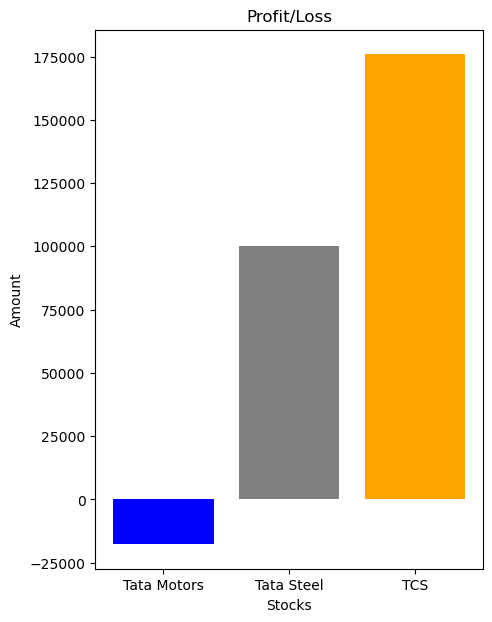

In [35]:
plt.figure(figsize=(5,7))
stock = ['Tata Motors', 'Tata Steel', 'TCS']
amt = [result1, result2, result3]
col = ['Blue', 'Grey', 'Orange']

plt.bar(stock, amt, color=col)

plt.title("Profit/Loss")
plt.xlabel("Stocks")
plt.ylabel("Amount")

#### Portfolio Allocation


Text(0.5, 1.0, 'Portfolio allocation')

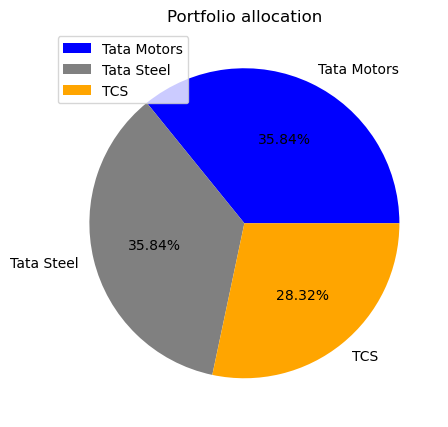

In [36]:
#Displaying Number of shares owned

plt.figure(figsize=(5,7))
stock = ['Tata Motors', 'Tata Steel', 'TCS']
shares = [s1, s2, s3]
col = ['Blue', 'Grey', 'Orange']

plt.pie(shares, labels=stock,autopct="%1.2f%%",colors=col)
plt.legend(title="",loc="upper left")
plt.title("Portfolio allocation")

This is NOT FINANCIAL ADVICE, and all work done in this project is for educational purposes only. This analysis depicts a stock’s long-term performance and shows the potential of SIP in the long run.